In [12]:
import os
import numpy as np
from nmf_methods.nmf_son.new import new as nmf_son_new
from nmf_methods.nmf_son.utils import save_results, load_results, plot_scores, plot_W_mats, plot_separate_H, plot_combined_H, merge_images, plot_and_merge
from sklearn.decomposition import NMF

np.random.seed(42)
np.set_printoptions(precision=3)

In [13]:
RUN = False

EARLY_STOP = True
VERBOSE = False
SCALE_REG = True

In [14]:
max_iters = 10000

In [15]:
M = np.load('../../experimental/datasets/urban_full.npz')['X']
m, n = M.shape

### vanilla NMF (r = 4)

In [16]:
r_true = 6
imgsize = (307, 307)
figsize = (32, 8)
fontsize = 10
num_rows = 1

ini_filepath = f'../../experimental/saved_models/urban/r{r_true}_ini.npz'
save_filepath = f'../../experimental/saved_models/urban/vanilla_r{r_true}_mit{max_iters}.npz'

In [17]:
if os.path.exists(ini_filepath):
    data = np.load(ini_filepath)
    ini_W = data['ini_W']
    ini_H = data['ini_H']
else:
    ini_W = np.random.rand(m, r_true)
    ini_H = np.random.rand(r_true, n)
    with open(ini_filepath, 'wb') as fout:
        np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

if RUN:
    model = NMF(n_components=r_true, init='custom', random_state=42, max_iter=max_iters)
    W = model.fit_transform(X=M, W=ini_W.copy(), H=ini_H.copy())
    H = model.components_
    with open(save_filepath, 'wb') as fout:
        np.savez_compressed(fout, W=W, H=H)
else:
    data2 = np.load(save_filepath)
    W = data2['W']
    H = data2['H']
    img_filenames = [f'../../experimental/images/urban/w_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/urban/seph_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/urban/combh_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/urban/r{r_true}_vanilla.png']
    plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)

### vanilla NMF (r = 20)

In [18]:
r = 20
figsize = (32, 16)
num_rows = 2

ini_filepath = f'../../experimental/saved_models/urban/r{r}_ini.npz'
save_filepath = f'../../experimental/saved_models/urban/vanilla_r{r}_mit{max_iters}.npz'

In [19]:
if os.path.exists(ini_filepath):
    data = np.load(ini_filepath)
    ini_W = data['ini_W']
    ini_H = data['ini_H']
else:
    ini_W = np.random.rand(m, r)
    ini_H = np.random.rand(r, n)
    with open(ini_filepath, 'wb') as fout:
        np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

In [20]:
if RUN:
    model = NMF(n_components=r, init='custom', random_state=42, max_iter=max_iters)
    W = model.fit_transform(X=M, W=ini_W.copy(), H=ini_H.copy())
    H = model.components_
    with open(save_filepath, 'wb') as fout:
        np.savez_compressed(fout, W=W, H=H)
else:
    data2 = np.load(save_filepath)
    W = data2['W']
    H = data2['H']
    img_filenames = [f'../../experimental/images/urban/w_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/urban/seph_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/urban/combh_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/urban/r{r}_vanilla.png']
    plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)

### nmf-son with random initialization

0.001
0.01
0.1
1
10
100
1000
10000


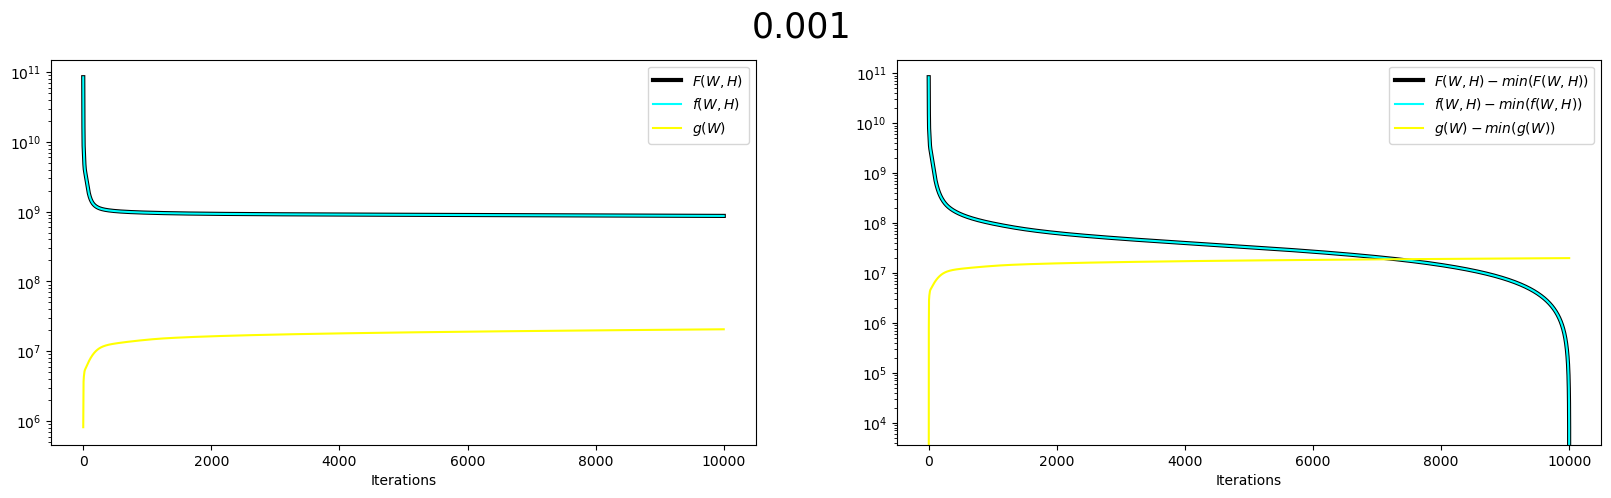

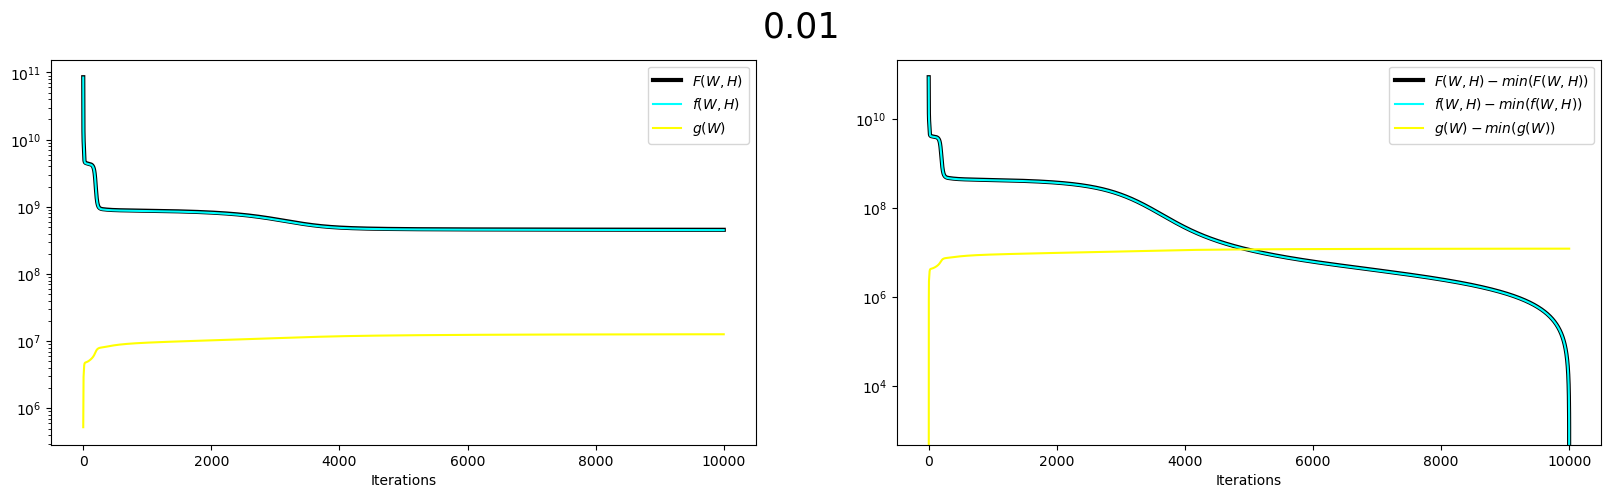

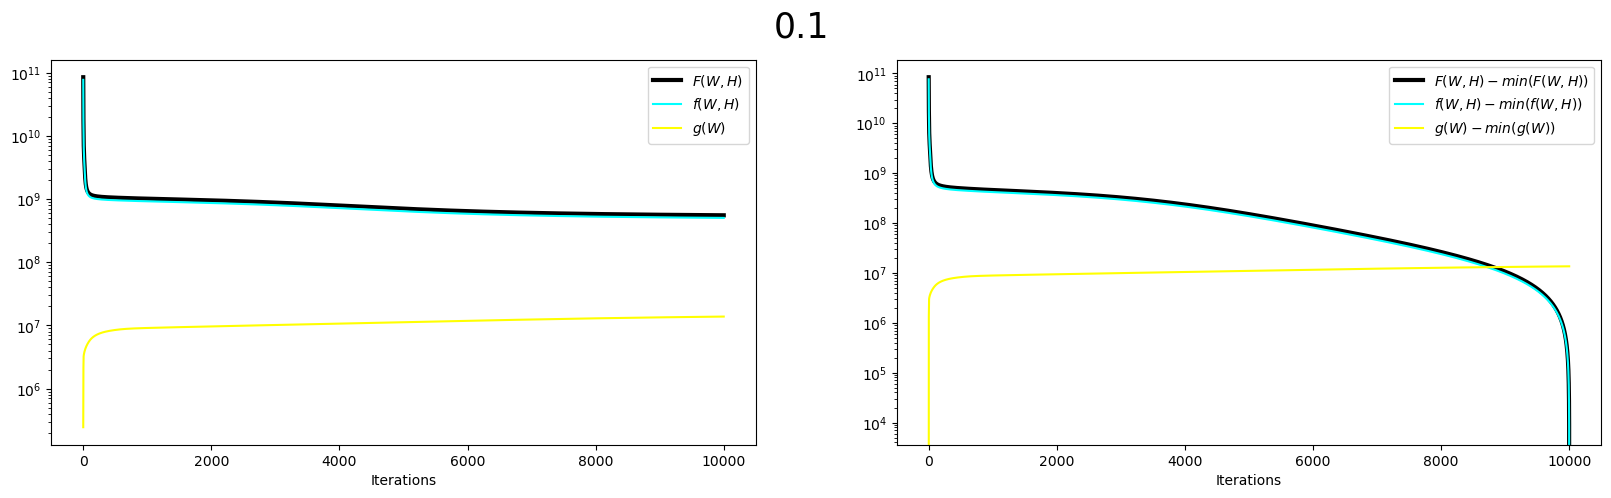

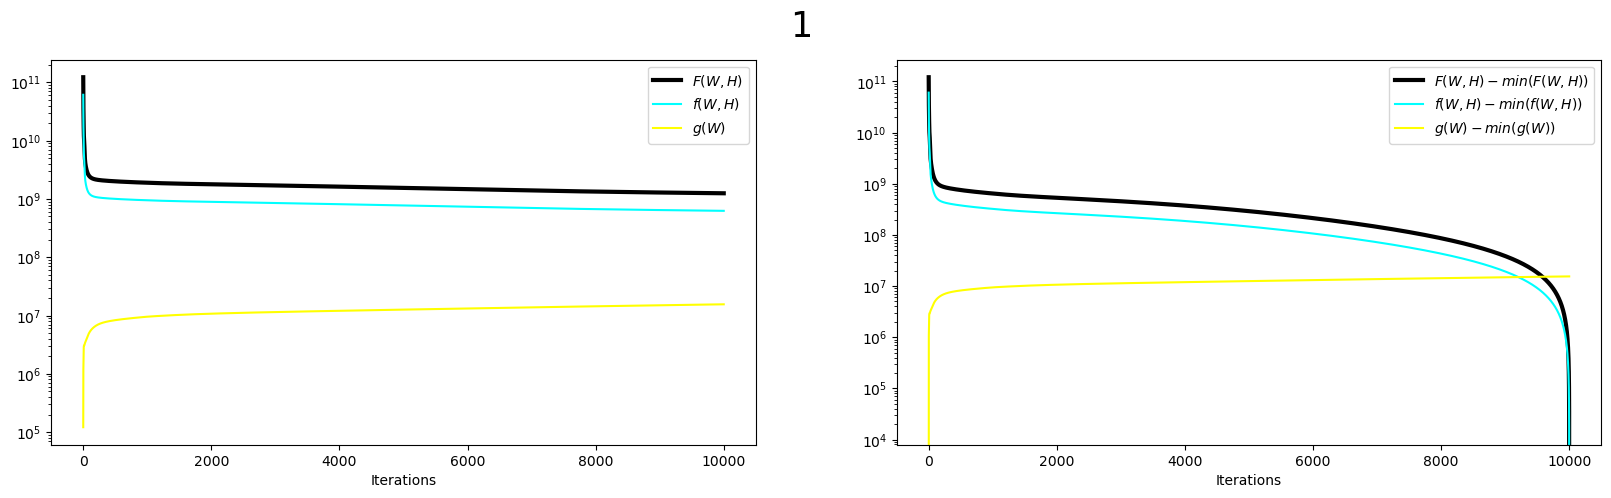

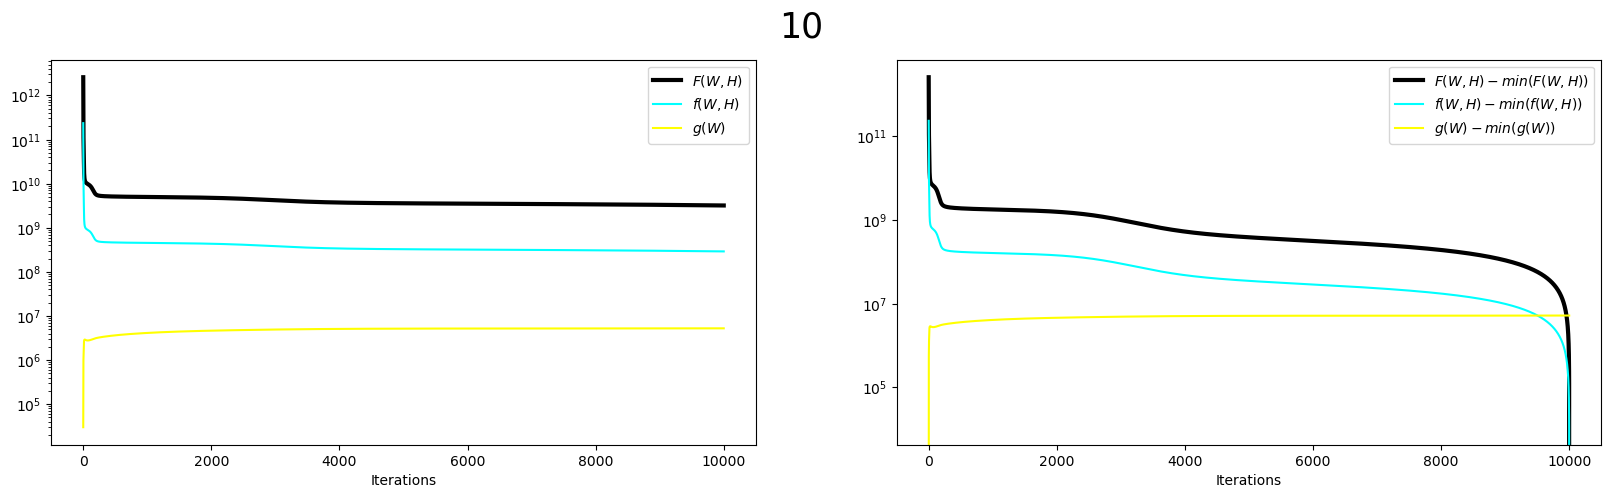

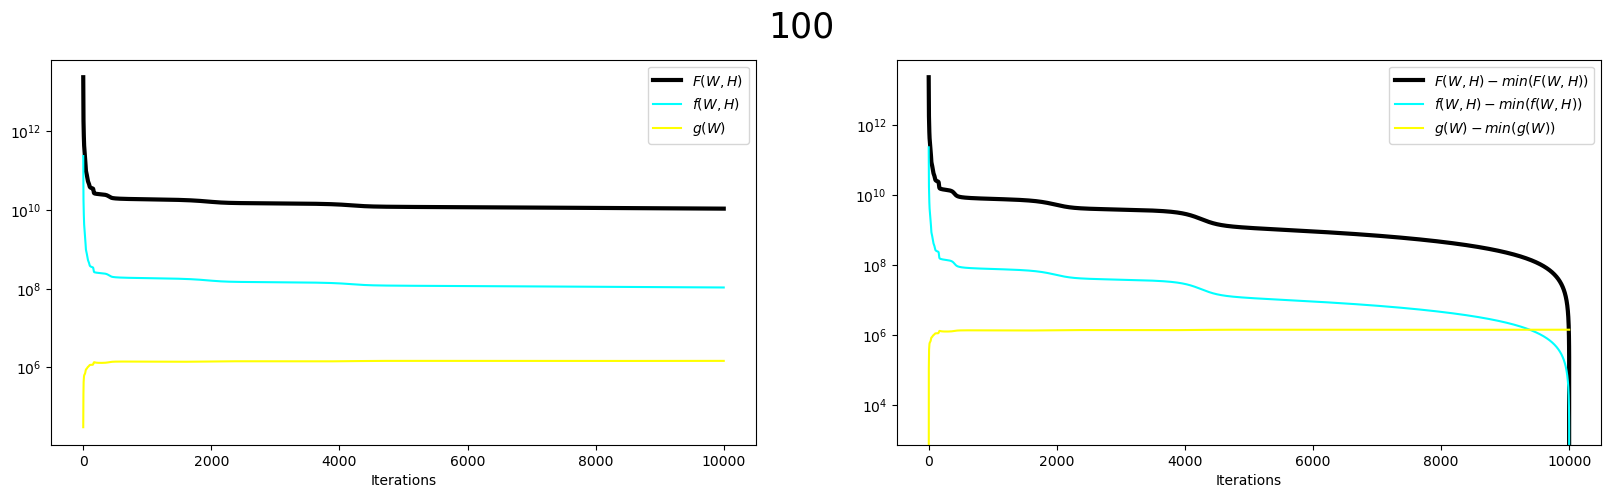

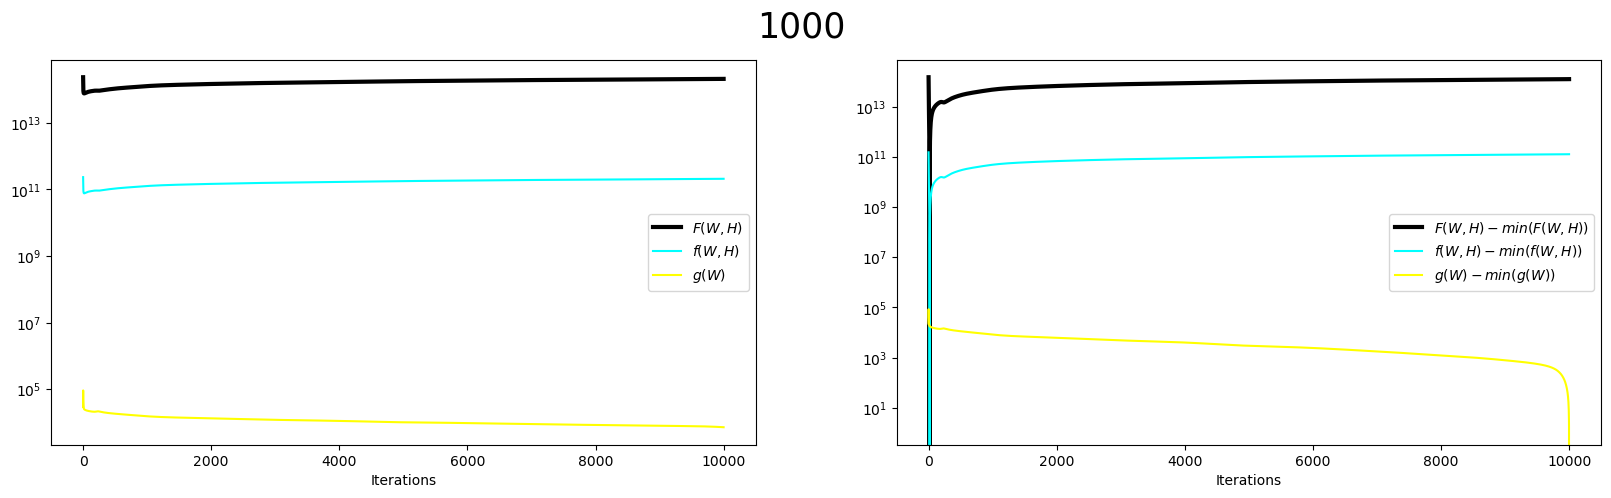

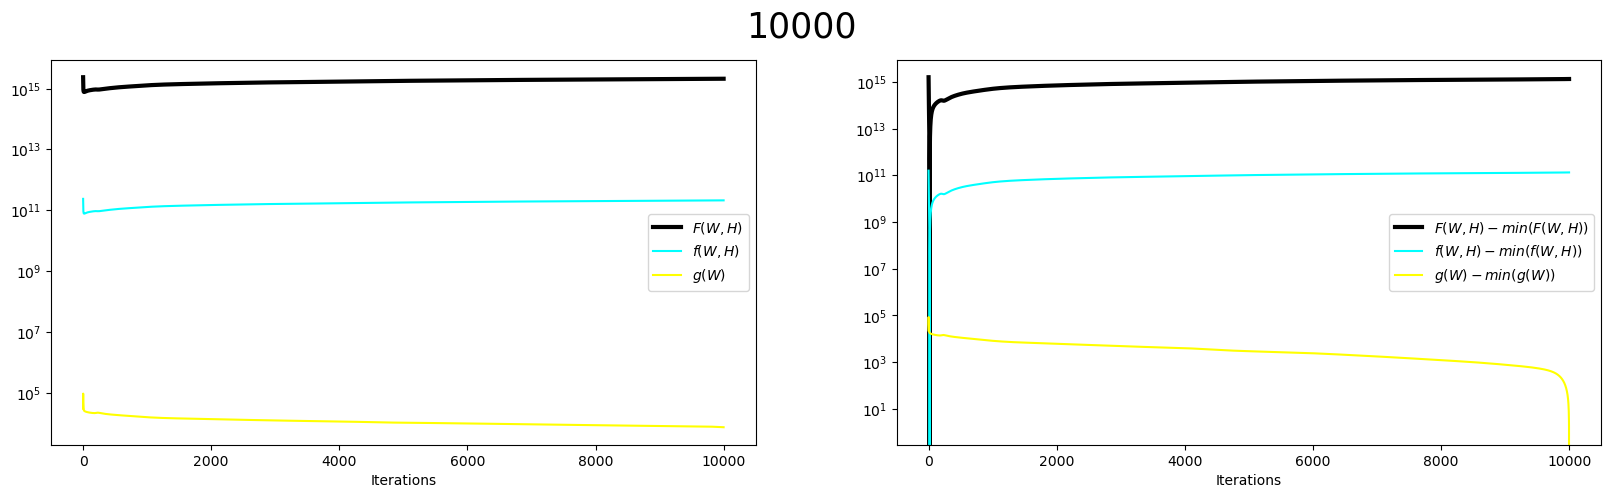

In [21]:
lambda_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
save_filepath = '../../experimental/saved_models/urban/r{}_l{}_mit{}.npz'

for _lam in lambda_vals:
    if RUN:
        W, H, fscores, gscores, lvals = nmf_son_new(M, ini_W.copy(), ini_H.copy(), lam=_lam, itermax=max_iters, early_stop=EARLY_STOP, verbose=VERBOSE, scale_reg=SCALE_REG)
        save_results(save_filepath.format(r, _lam, max_iters), W, H, fscores, gscores, lvals)
    else:
        W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))
        plot_scores(fscores, gscores, lvals, plot_title=_lam)

        img_filenames = [f'../../experimental/images/urban/w_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/urban/seph_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/urban/combh_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/urban/r{r}_l{_lam}_mit{max_iters}.png']
        plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)
    print(_lam)